# Import libraries and dataset

In [30]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Setting pandas options to display all columns in the output
pd.set_option("display.max_columns", None)

# Reading the training dataset from a CSV file into a pandas DataFrame
train_data = pd.read_csv('train.csv')

# Reading the test dataset from a CSV file into a pandas DataFrame
test_data = pd.read_csv('test.csv')

# Display the first few rows of the train datasets (for verification)

In [32]:
print("Training Data Sample:")
train_data.head()

Training Data Sample:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


# Display the first few rows of the test datasets (for verification)

In [34]:
print("Test Data Sample:")
test_data.head()

Test Data Sample:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Count how many times each unique value appears in the 'HomePlanet' column

In [36]:
print(train_data['HomePlanet'].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


# Count how many times each unique value appears in the 'CryoSleep' column

In [38]:
print(train_data['CryoSleep'].value_counts())

CryoSleep
False    5439
True     3037
Name: count, dtype: int64


# Count how many times each unique value appears in the 'Destination' column

In [40]:
print(train_data['Destination'].value_counts())

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


# Count how many times each unique value appears in the 'VIP' column

In [42]:
print(train_data['VIP'].value_counts())

VIP
False    8291
True      199
Name: count, dtype: int64


# Looking at the Dataset Shape

In [44]:
print("Training Dataset shape is: ",train_data.shape[0], "rows and",train_data.shape[1] )
print("Testing Dataset shape is: ",test_data.shape[0], "rows and", test_data.shape[1])

Training Dataset shape is:  8693 rows and 14
Testing Dataset shape is:  4277 rows and 13


# Checking if there are any duplicate entries in the dataset

In [46]:
# Calculate the percentage of duplicate rows in the training dataset
print(f"Percentage of duplicate rows in the training dataset: {train_data.duplicated().sum() * 100 /train_data.shape[0]}%")

# Calculate the percentage of duplicate rows in the testing dataset
print(f"Percentage of duplicate rows in the testing dataset: {test_data.duplicated().sum() * 100 /test_data.shape[0]}%")

Percentage of duplicate rows in the training dataset: 0.0%
Percentage of duplicate rows in the testing dataset: 0.0%


# Displaying a summary of the train and test dataset, including data types and missing values

In [48]:
print("Training Data Overview:\n")
train_data.info()

# Adding a separator for better readability
print("\n" + "="*60 + "\n")

print("Testing Data Overview:\n")
test_data.info()

Training Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 950.9+ KB


Testing Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (to

# Calculating missing values in train and test datasets

In [50]:
# Calculating missing values count for each column in the training dataset
train_missing_count = train_data.isnull().sum()

# Calculating missing values percentage for each column in the training dataset
train_missing_percentage = train_data.isnull().mean() * 100  

# Creating a DataFrame to store missing values count and percentage for training data
train_missing_info = pd.DataFrame({'Missing Count': train_missing_count, 'Missing Percentage': train_missing_percentage})

# Calculating missing values count for each column in the testing dataset
test_missing_count = test_data.isnull().sum()

# Calculating missing values percentage for each column in the testing dataset
test_missing_percentage = test_data.isnull().mean() * 100  

# Creating a DataFrame to store missing values count and percentage for testing data
test_missing_info = pd.DataFrame({'Missing Count': test_missing_count, 'Missing Percentage': test_missing_percentage})

# Displaying the missing values information for Training dataset
print("Missing Values in Training Dataset:\n\n", train_missing_info)

# Adding a separator for better readability
print("\n" + "="*60 + "\n")

# Displaying the missing values information for Testing dataset
print("\nMissing Values in Testing Dataset:\n\n", test_missing_info)


Missing Values in Training Dataset:

               Missing Count  Missing Percentage
PassengerId               0            0.000000
HomePlanet              201            2.312205
CryoSleep               217            2.496261
Cabin                   199            2.289198
Destination             182            2.093639
Age                     179            2.059128
VIP                     203            2.335212
RoomService             181            2.082135
FoodCourt               183            2.105142
ShoppingMall            208            2.392730
Spa                     183            2.105142
VRDeck                  188            2.162660
Name                    200            2.300702
Transported               0            0.000000



Missing Values in Testing Dataset:

               Missing Count  Missing Percentage
PassengerId               0            0.000000
HomePlanet               87            2.034136
CryoSleep                93            2.174421
Cabin     

# Exploratory Data Analysis (EDA)

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Train data EDA

In [54]:
train_data_copy = train_data.copy()

## Passenger Transport Status Overview

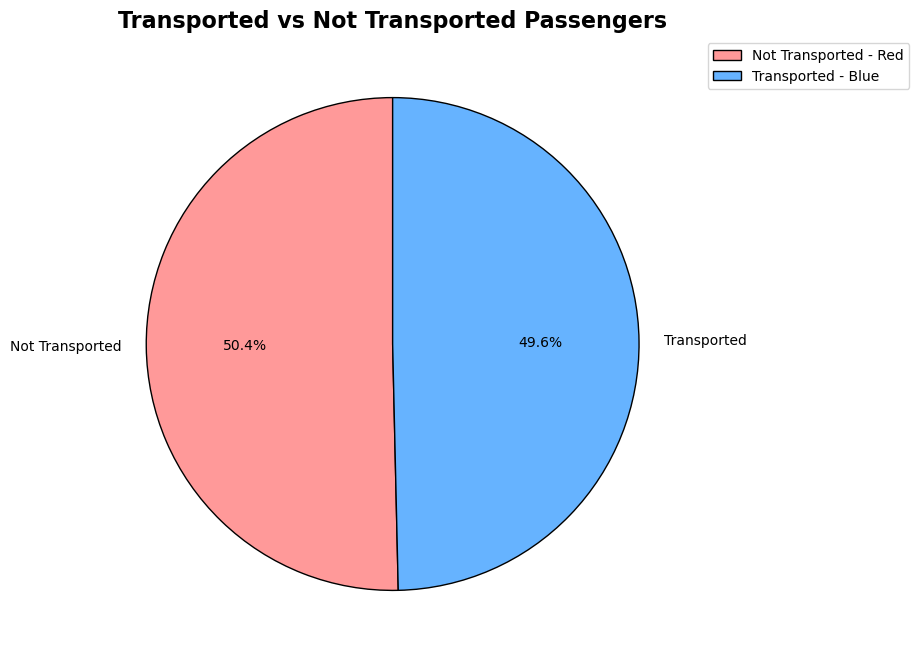

In [56]:
# Count values
transported_counts = train_data_copy["Transported"].value_counts()

# Define colors
colors = ["#ff9999", "#66b3ff"]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(transported_counts, labels=["Not Transported", "Transported"], 
        autopct="%1.1f%%", startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'black'})

# Add Legend on the top-right side
plt.legend(["Not Transported - Red", "Transported - Blue"], 
           loc="upper left", bbox_to_anchor=(1, 1))

# Title
plt.title("Transported vs Not Transported Passengers", fontsize=16, fontweight="bold")


# Show plot
plt.show()


In [57]:
# Count how many people were transported (True) and not transported (False)
transported_counts = train_data_copy["Transported"].value_counts()

# Display the count and percentage of transported vs. not transported passengers
total_passengers = transported_counts.sum()

print("Transported vs Not Transported Summary:")
print(f"Not Transported: {transported_counts.iloc[0]} passengers ({(transported_counts.iloc[0] / total_passengers) * 100:.1f}%)")
print(f"Transported: {transported_counts.iloc[1]} passengers ({(transported_counts.iloc[1] / total_passengers) * 100:.1f}%)")


Transported vs Not Transported Summary:
Not Transported: 4378 passengers (50.4%)
Transported: 4315 passengers (49.6%)


## Transported Status by Age

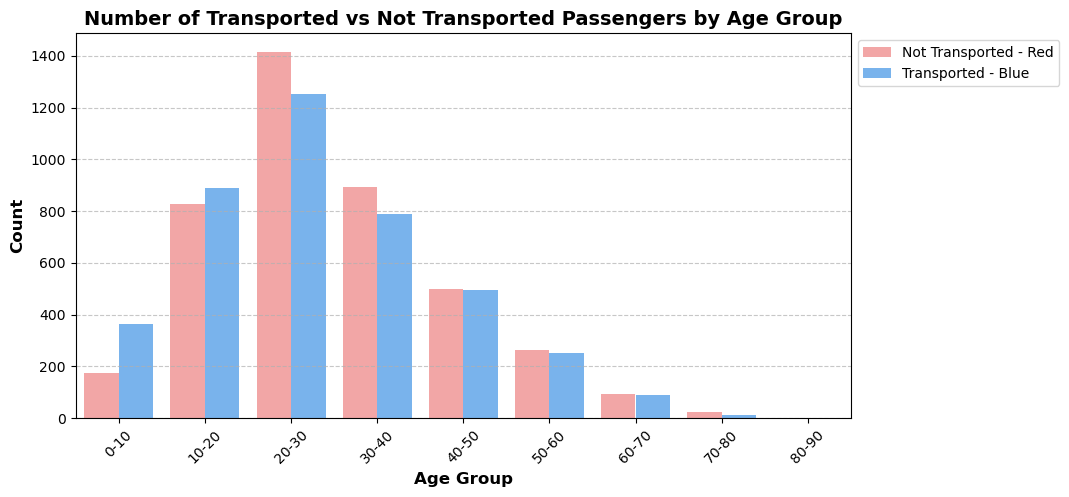

In [59]:
# Define custom colors
custom_palette = {False: "#ff9999", True: "#66b3ff"}  # Not Transported = Red, Transported = Blue

# Create age groups (bins)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # Defining age ranges
train_data_copy["AgeGroup"] = pd.cut(train_data_copy["Age"], bins=age_bins, 
                                     labels=["0-10", "10-20", "20-30", "30-40", "40-50", 
                                             "50-60", "60-70", "70-80", "80-90"])

# Create the count plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=train_data_copy, x="AgeGroup", hue="Transported", palette=custom_palette)

# Customize labels and title
plt.xlabel("Age Group", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Number of Transported vs Not Transported Passengers by Age Group", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Corrected legend retrieval
handles, labels = ax.get_legend_handles_labels()  # Corrected from 'box' to 'ax'
plt.legend(handles, ["Not Transported - Red", "Transported - Blue"], loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [60]:
# Define age groups (bins) and assign each passenger to an age group
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # Defining age ranges
age_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]

# Creating a new column 'AgeGroup' with assigned age ranges
train_data_copy["AgeGroup"] = pd.cut(train_data_copy["Age"], bins=age_bins, labels=age_labels)

# Counting the number of transported and not transported passengers in each age group (Fix applied)
age_group_transport_counts = train_data_copy.groupby("AgeGroup", observed=False)["Transported"].value_counts().unstack()

# Displaying the results in a structured format
print("Transported vs Not Transported Passengers by Age Group:")
print(age_group_transport_counts)


Transported vs Not Transported Passengers by Age Group:
Transported     0     1
AgeGroup               
0-10          176   364
10-20         828   889
20-30        1416  1252
30-40         893   787
40-50         499   495
50-60         264   253
60-70          93    90
70-80          23    14
80-90           0     0


## Visualizing Categorical Features

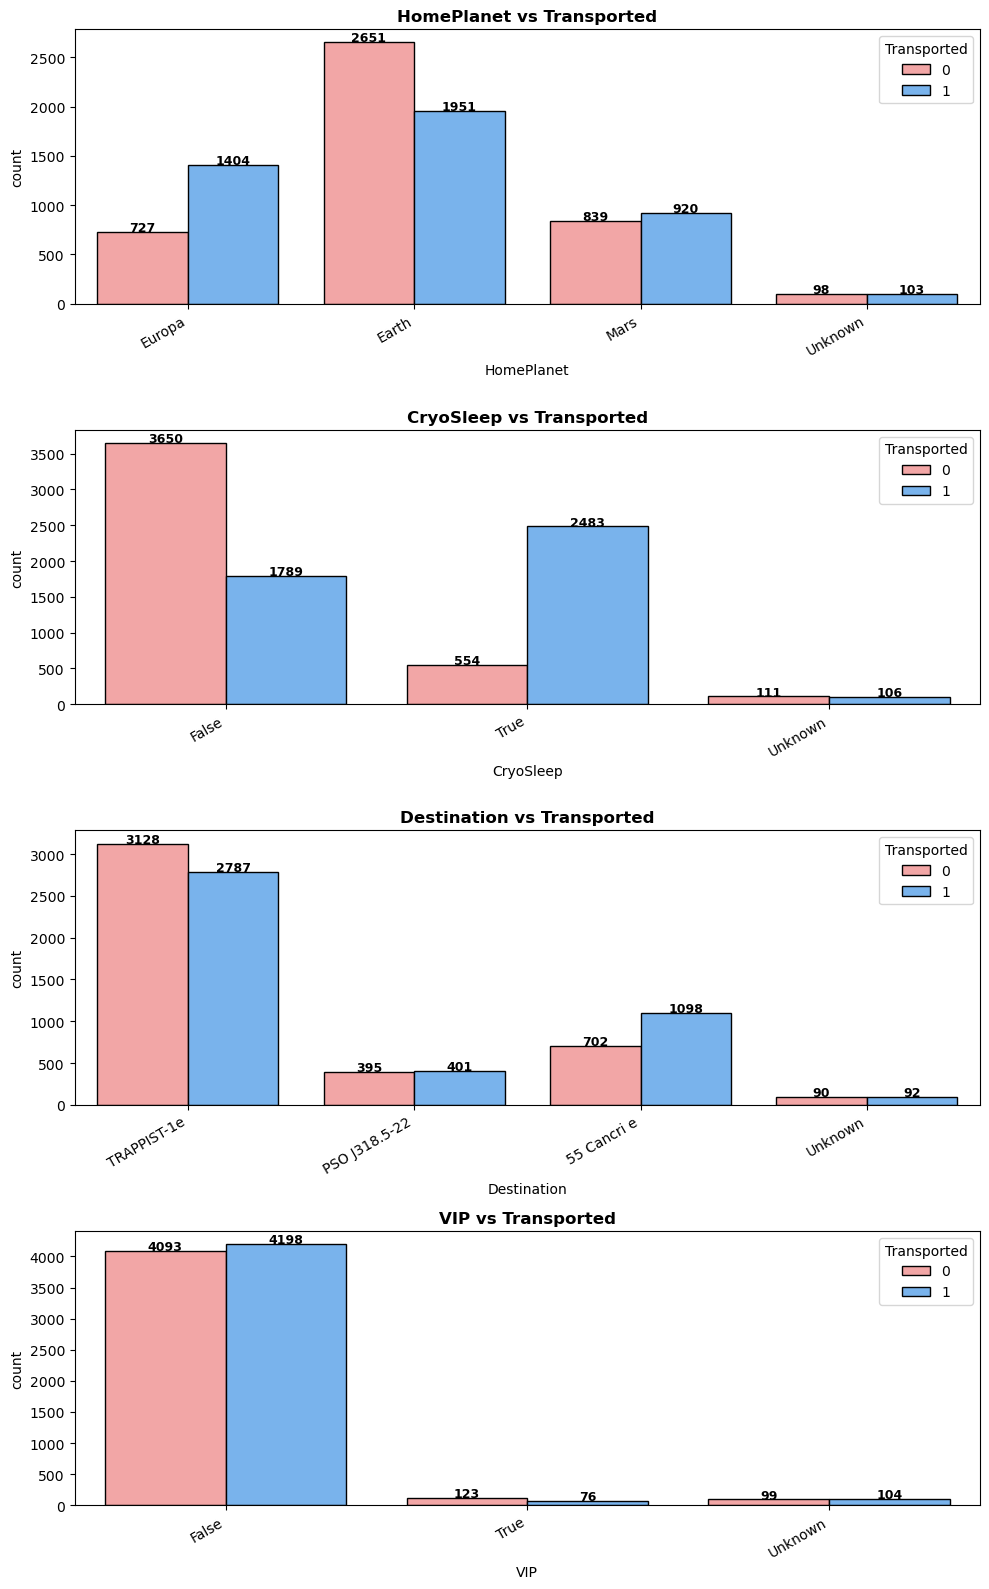

In [62]:
# Define categorical columns
cat_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

# Set color palette and figure size
plt.figure(figsize=(10, 16))  # Increased height slightly

# Loop through each categorical column
for idx, column in enumerate(cat_cols):
    plt.subplot(4, 1, idx + 1)
    train_data_copy[column] = train_data_copy[column].fillna("Unknown")  # Fill missing values

    sns.countplot(x=column, hue="Transported", data=train_data_copy, palette=["#ff9999", "#66b3ff"], edgecolor="black")

    for p in plt.gca().patches:
        if p.get_height() > 0:
            plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 10, f"{int(p.get_height())}", ha="center", fontsize=9, fontweight="bold")

    plt.title(f"{column} vs Transported", fontsize=12, fontweight="bold")
    plt.xticks(rotation=30, ha="right")

plt.tight_layout()
plt.show()


# Missing value count of the column

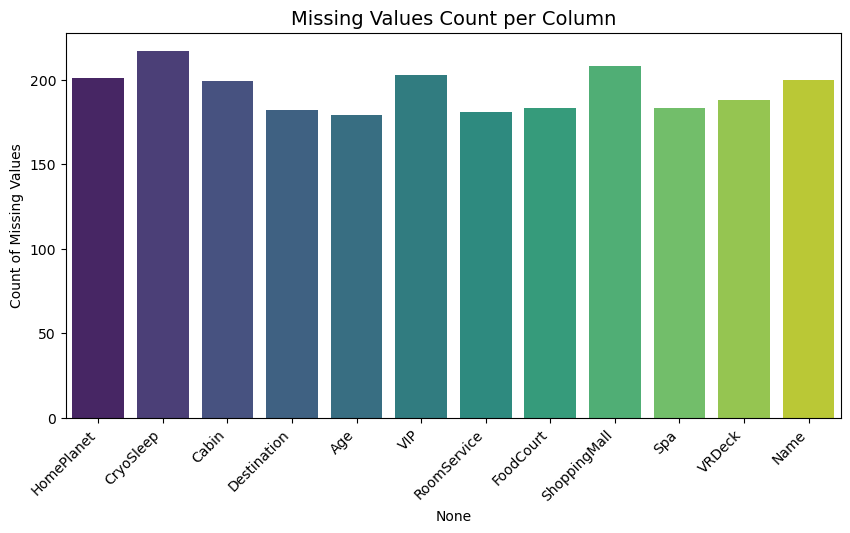

In [64]:
# Count missing values per column
missing_counts = train_data.isnull().sum()

# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Set figure size
plt.figure(figsize=(10, 5))

# Plot bar chart with corrected parameters
sns.barplot(x=missing_counts.index, y=missing_counts.values, hue=missing_counts.index, palette="viridis", legend=False)

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count of Missing Values")
plt.title("Missing Values Count per Column", fontsize=14)

# Show the plot
plt.show()

In [65]:
# Count missing values per column
missing_counts = train_data.isnull().sum()

# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Display the missing value counts
print("Missing Values Count per Column:")
print(missing_counts)

Missing Values Count per Column:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


## Survival Rate by Cabin Deck (Bar Plot)

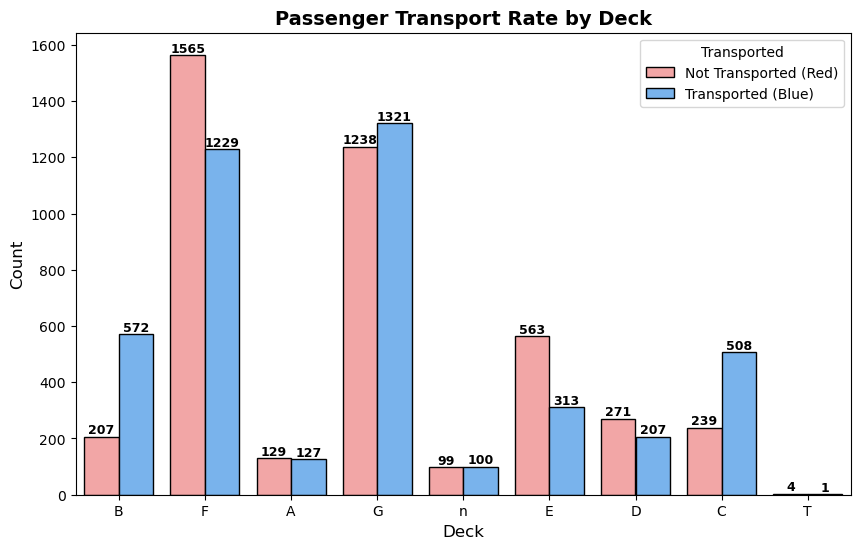

In [67]:
# Extract Deck from Cabin
train_data_copy["Deck"] = train_data_copy["Cabin"].astype(str).str[0]  # Take first letter as Deck

# Define colors
colors = ["#ff9999", "#66b3ff"]  # Red for Not Transported, Green for Transported

plt.figure(figsize=(10, 6))
sns.countplot(x="Deck", hue="Transported", data=train_data_copy, palette=colors, edgecolor="black")

plt.title("Passenger Transport Rate by Deck", fontsize=14, fontweight="bold")
plt.xlabel("Deck", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)

# Display count labels
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 10, f"{int(p.get_height())}", ha="center", fontsize=9, fontweight="bold")

# Add legend with labels
plt.legend(title="Transported", labels=["Not Transported (Red)", "Transported (Blue)"])

plt.show()


## Passengers Per Destination (Pie Chart)

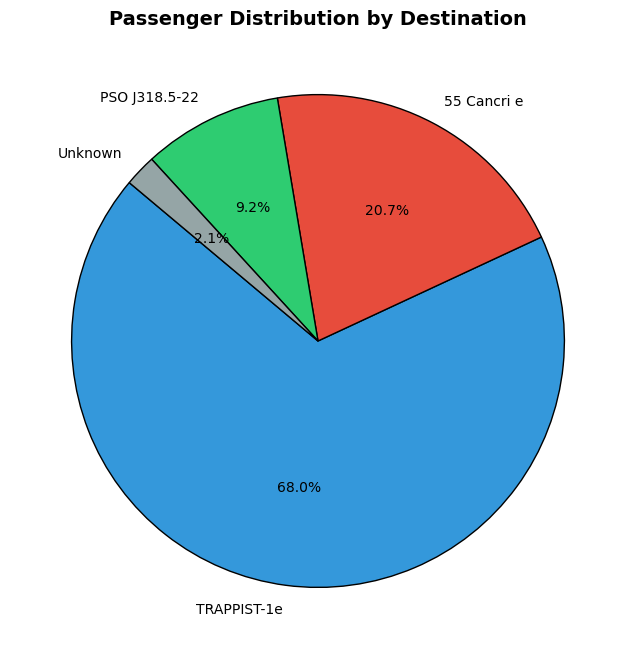

In [69]:
# Ensure missing values are replaced with "Unknown"
train_data_copy["Destination"] = train_data_copy["Destination"].fillna("Unknown")

# Define colors, adding a specific color for "Unknown"
destination_colors = {
    "TRAPPIST-1e": "#3498db",  # Blue
    "PSO J318.5-22": "#e74c3c",  # Red
    "55 Cancri e": "#2ecc71",  # Green
    "Unknown": "#95a5a6"  # Gray for Unknown
}

# Apply the colors based on unique destination values
colors = [destination_colors[dest] for dest in train_data_copy["Destination"].unique()]

# Plot the pie chart
plt.figure(figsize=(8, 8))
train_data_copy["Destination"].value_counts().plot.pie(
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Passenger Distribution by Destination", fontsize=14, fontweight="bold")
plt.ylabel("")  # Hide y-axis label

plt.show()


In [70]:
# Count the number of passengers for each destination, including "Unknown"
destination_counts = train_data_copy["Destination"].value_counts()

# Display the counts
print("Passenger Count per Destination:")
print(destination_counts)


Passenger Count per Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Unknown           182
Name: count, dtype: int64


## Passenger Distribution by VIP Status (Pie Chart)

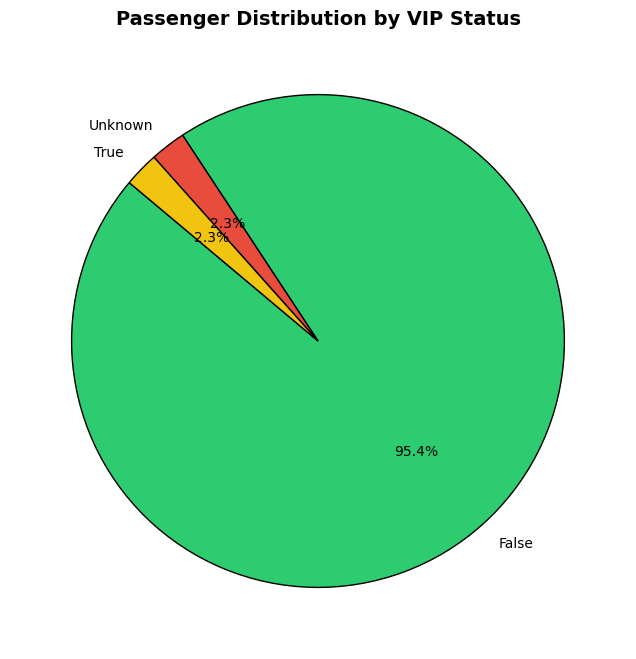

In [72]:
plt.figure(figsize=(8, 8))

# Define colors for each category
colors = ["#2ecc71", "#e74c3c", "#f1c40f"]  # Green for True, Red for False, Yellow for Unknown

# Create a pie chart directly from train_data_copy
train_data_copy["VIP"].value_counts().plot.pie(
    autopct="%1.1f%%",  # Show percentage labels
    colors=colors,  # Assign different colors
    startangle=140,  # Rotate the pie chart for better visibility
    wedgeprops={"edgecolor": "black"}  # Add black edges for clarity
)

# Add title and formatting
plt.title("Passenger Distribution by VIP Status", fontsize=14, fontweight="bold")
plt.ylabel("")  # Hide y-axis label

# Show the plot
plt.show()


## Passenger Count per Cabin Deck (Bar Plot)

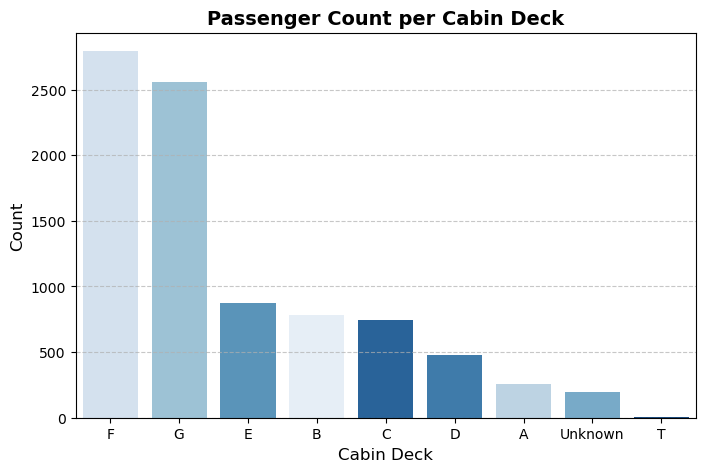

In [74]:
# Extract Deck (First letter of Cabin) and handle NaN values
train_data_copy["Deck"] = train_data_copy["Cabin"].astype(str).str[0]
train_data_copy["Deck"] = train_data_copy["Deck"].replace("n", "Unknown")  # Handling NaNs that turn into "n"

plt.figure(figsize=(8, 5))
sns.countplot(x="Deck", data=train_data_copy, hue="Deck", dodge=False, legend=False, order=train_data_copy["Deck"].value_counts().index, palette=sns.color_palette("Blues", len(train_data_copy["Deck"].unique())))

plt.title("Passenger Count per Cabin Deck", fontsize=14, fontweight="bold")
plt.xlabel("Cabin Deck", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Preprocess for the data

In [76]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separating the features (X) and the target variable (y)
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Preprocessing for numerical data: Handling missing values by replacing them with the mean
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data: Handling missing values and encoding categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Filling missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Encoding categorical values while ignoring unknown categories
])

# Combining preprocessing steps for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [77]:
# Displaying the selected columns for verification
print(f"Numerical Columns: {list(numerical_cols)}")
print(f"Categorical Columns: {list(categorical_cols)}")

Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


# Build the model

In [79]:
# Define the model             # number of decision trees
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split data into training (80%) and validation (20%) subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
# Preprocessing training data and fitting the model
pipeline.fit(X_train, y_train)

# Preprocessing validation data and getting probability predictions
valid_probs = pipeline.predict_proba(X_valid)

# Extracting the probabilities for the 'Transported' class
valid_transported_probs = valid_probs[:, 1]

# Evaluate the model using AUC
auc_score = roc_auc_score(y_valid, valid_transported_probs)
print(f"AUC Score is: {auc_score}")

AUC Score is: 0.8455749297607899


In [162]:
# Check the test data ()
valid_probs[:50, 1]

array([0.3 , 0.66, 0.03, 0.17, 0.95, 0.08, 0.07, 0.6 , 0.98, 0.24, 0.47,
       0.08, 0.53, 0.38, 0.19, 0.98, 0.96, 0.92, 0.8 , 0.04, 0.44, 0.07,
       1.  , 0.94, 0.99, 0.2 , 0.98, 0.94, 0.14, 1.  , 0.57, 0.98, 0.19,
       0.89, 0.39, 0.89, 0.03, 0.41, 0.16, 1.  , 0.15, 0.96, 0.65, 0.04,
       0.05, 0.83, 0.02, 0.98, 0.98, 0.3 ])

In [82]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=0))])

In [83]:
# Assuming binary classification
valid_predss = (valid_probs[:, 1] >= 0.5).astype(int)

In [84]:
valid_predss

array([0, 1, 0, ..., 1, 0, 0])

In [85]:
pred_df=pd.DataFrame({'Actual Value':y_valid,'Predicted Value':valid_predss,'Difference':y_valid == valid_predss})
pred_df.head(10)

,Actual Value,Predicted Value,Difference
3601,1,0,False
6057,1,1,True
2797,0,0,True
7110,0,0,True
8579,1,1,True
989,0,0,True
5166,0,0,True
4644,1,1,True
5049,1,1,True
6523,1,0,False


In [86]:
pred_df.shape

(1739, 3)

In [87]:
pred_df['Difference'].value_counts()

Difference
True     1354
False     385
Name: count, dtype: int64

# Check the Brier Score

In [89]:
from sklearn.metrics import brier_score_loss

# Calculate the Brier score
brier_score = brier_score_loss(y_valid, valid_transported_probs)
print(f"brier score is: {brier_score}")

brier score is: 0.1678276020701553


# Check the Precision, Recall, and F1-score

In [91]:
# check f1 score also

# Importing necessary metrics for evaluating the model
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculating precision: Measures how many predicted positives are actually correct
precision = precision_score(y_valid, valid_predss)

# Calculating recall: Measures how many actual positives were correctly identified
recall = recall_score(y_valid, valid_predss)


f1 = f1_score(y_valid, valid_predss)

# Displaying individual scores
print(f"Precision: {precision}")  
print(f"Recall: {recall}")  
print(f"F1-score: {f1}")  

Precision: 0.8019680196801968
Recall: 0.7442922374429224
F1-score: 0.7720544701006513


# Save prediction

In [93]:
# Preprocessing of test data, make probability predictions
test_probs = pipeline.predict_proba(test_data)

# Extracting the probabilities for the 'Transported' class
transported_probs = test_probs[:, 1]  # Probability of being transported

In [94]:
# Create a DataFrame with the PassengerId and the probabilities
output_probs = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': transported_probs})

In [95]:
output_probs.to_csv('Model RF.csv', index=False)

# Save the model

In [97]:
import pickle

In [98]:
with open('Spaceship Titanic RF model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Check trained dataset by giving input

In [100]:
# Creating an empty DataFrame with the same structure as the dataset
df = pd.DataFrame(columns=[
    "PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", 
    "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", 
    "Name"
])

In [101]:
# Defining a new input passenger's data
new_passenger = [
    '10101_01',   # Passenger ID
    'Earth',      # Home Planet
    True,         # Whether in CryoSleep (converted from np.True_ to Python True)
    'F/1/S',      # Cabin location
    'TRAPPIST-1e',# Destination
    20,           # Age
    True,         # Whether VIP status is True
    303,          # Room Service expenditure
    70,           # Food Court expenditure
    151,          # Shopping Mall expenditure
    565,          # Spa expenditure
    2,            # VR Deck expenditure
    'Tom'         # Passenger's Name
]

In [102]:
df.loc[len(df)] = new_passenger

In [103]:
# df.drop(0,axis=0,inplace=True)

In [104]:
# Using the trained model pipeline to predict the probability of being transported for the newly added passenger
pipeline.predict_proba(df)[:, 1]

array([0.57])